## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

# sns.set_theme(style="darkgrid")
# pd.set_option('display.max_columns', None)  

# import sys, os, yaml

# DATASET = "Exercises Datasets"
# COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

In [2]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Load

Escolha alguns datasets, à seu critério, para trabalhar.

In [2]:
df1 = pd.read_pickle("data/basic1.pickle")
df2 = pd.read_pickle("data/dart.pickle")
df3 = pd.read_pickle("data/hyperplane.pickle")

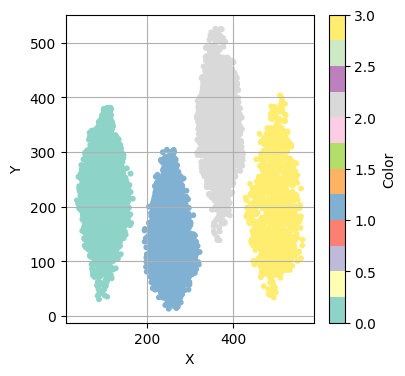

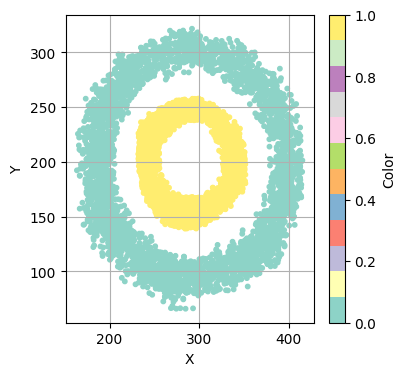

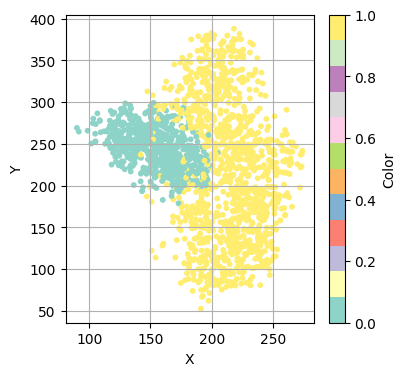

In [3]:
plt.figure(figsize=(4, 4))
plt.scatter(df1['x'], df1['y'], c=df1['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df2['x'], df2['y'], c=df2['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df3['x'], df3['y'], c=df3['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

## Pre-Processing

In [4]:
df1_kmeans = df1.copy()
df2_kmeans = df2.copy()
df3_kmeans = df3.copy()

In [5]:
df1_kmeans.drop(['color'], axis = 1, inplace =True)
df2_kmeans.drop(['color'], axis = 1, inplace =True)
df3_kmeans.drop(['color'], axis = 1, inplace =True)

## Elbow

Nesses datasets nós já temos os Clusters ideais, então fica facultativo usar o Elbow ou outro método para definição do K.

Você pode contar quantas cores/clusters o dataset possui. 

In [6]:
df1['color'].nunique()
df2['color'].nunique()
df3['color'].nunique()

2

## Models

Vimos em aula o Kmeans

Tente também implementar os outros metodos e compare os resultados fazendo o plot do df_original (com as cores dos clusters ideais) e ao lado o plot com os clusters dos modelos

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# KMeans
kmeans = KMeans(n_clusters=4, random_state=SEED)
df1['kmeans_labels'] = kmeans.fit_predict(df1[['x', 'y']])
df2['kmeans_labels'] = kmeans.fit_predict(df2[['x', 'y']])
df3['kmeans_labels'] = kmeans.fit_predict(df3[['x', 'y']])

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
df1['agg_labels'] = agg_clustering.fit_predict(df1[['x', 'y']])
df2['agg_labels'] = agg_clustering.fit_predict(df2[['x', 'y']])
df3['agg_labels'] = agg_clustering.fit_predict(df3[['x', 'y']])

# DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
df1['dbscan_labels'] = dbscan.fit_predict(df1[['x', 'y']])
df2['dbscan_labels'] = dbscan.fit_predict(df2[['x', 'y']])
df3['dbscan_labels'] = dbscan.fit_predict(df3[['x', 'y']])

# Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=SEED)
df1['gmm_labels'] = gmm.fit_predict(df1[['x', 'y']])
df2['gmm_labels'] = gmm.fit_predict(df2[['x', 'y']])
df3['gmm_labels'] = gmm.fit_predict(df3[['x', 'y']])

## Results

Comente sobre a performance das diferentes técnicas

### Qual é o propósito principal de usar técnicas de clustering em aprendizado de máquina?

O propósito principal de usar técnicas de clustering em aprendizado de máquina é agrupar dados não rotulados em grupos ou clusters com base em suas características semelhantes. Isso permite identificar padrões, estruturas e relações nos dados, bem como segmentar os dados em grupos distintos. O clustering é útil para explorar e entender a estrutura subjacente dos dados, identificar outliers, realizar análises exploratórias de dados e até mesmo para pré-processamento de dados antes de aplicar outras técnicas de aprendizado de máquina.

### Quais são algumas das métricas comuns usadas para avaliar a qualidade de um cluster?


Algumas das métricas comuns usadas para avaliar a qualidade de um cluster são:

1. Coeficiente de Silhueta: Mede o quão bem cada amostra se encaixa no seu próprio cluster em comparação com outros clusters. Valores mais altos indicam uma melhor separação dos clusters.

2. Índice de Calinski-Harabasz: Calcula a relação entre a dispersão dentro dos clusters e a dispersão entre os clusters. Valores mais altos indicam uma melhor separação dos clusters.

3. Índice Davies-Bouldin: Mede a similaridade média entre cada cluster e seu cluster vizinho mais próximo. Valores mais baixos indicam uma melhor separação dos clusters.

4. Inércia: Mede a soma das distâncias quadráticas das amostras em relação ao centro do cluster. Valores mais baixos indicam uma melhor compactação dos clusters.

Essas métricas podem ser usadas para comparar diferentes algoritmos de clustering ou para avaliar a qualidade de um único conjunto de clusters. É importante considerar o contexto e os requisitos específicos do problema ao escolher a métrica adequada.

### Como você decide o número ideal de clusters a serem usados em um determinado conjunto de dados?

Existem várias abordagens para determinar o número ideal de clusters em um conjunto de dados. Algumas das técnicas comuns incluem:

1. Método do cotovelo (Elbow Method): Este método envolve plotar a variância explicada em relação ao número de clusters. O número ideal de clusters é identificado no ponto em que a adição de mais clusters não resulta em uma redução significativa na variância explicada.

2. Método da silhueta (Silhouette Method): Este método calcula a silhueta média de cada ponto em relação aos outros pontos no mesmo cluster e em clusters vizinhos. O número ideal de clusters é aquele que maximiza a silhueta média, indicando uma boa separação entre os clusters.

3. Análise de dendrograma: Para algoritmos de clustering hierárquico, um dendrograma pode ser plotado para visualizar a estrutura de agrupamento. O número ideal de clusters pode ser identificado observando a altura das ramificações no dendrograma.

4. Métodos baseados em índices: Existem vários índices, como o índice Calinski-Harabasz e o índice Davies-Bouldin, que medem a qualidade dos clusters. O número ideal de clusters é aquele que maximiza esses índices.

É importante considerar o contexto do problema e o conhecimento do domínio ao escolher o número ideal de clusters. Além disso, é recomendado realizar experimentos com diferentes números de clusters e avaliar os resultados para tomar uma decisão informada.

https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study#2.-Set-up